In [1006]:
import numpy as np
import matplotlib.pyplot as plt
import random
import queue
import time
from IPython.display import clear_output

In [1120]:
#Functions that will be very useful for creating/updating mazes

'''
Define the grid to be working with

            **inputs**

-dim = dimension size of the grid 
-p = probability that a grid spot will be filled or open

            **returns**
            
-a = the grid to be worked with
'''

def grid(dim, p):
    #start with a dim by dim zero array
    a = np.zeros((dim,dim))
    for item in range(dim):
        for thing in range(dim):
            #makes sure the top left spot is empty
            if item == 0 and thing == 0:
                pass
            #makes sure the bottom right spot is empty
            elif item == dim - 1 and thing == dim - 1:
                pass
            #change the cells based off of the value of p and our random number
            else:
                x = random.random()
                #if our random number is less than p, then the cell will not be filled
                if p < x:
                    a[item][thing] = 0
                #if our random number is greater than p, then the cell will  be filled
                else:
                    a[item][thing] = 1
    #return the grid to be worked with
    return a


'''
update the state of the maze after moving to the next tile

            **inputs**

-maze = the maze to be updated
-i = which row to update
-j = which column to update
'''

def update(maze, i, j):
    #shades the tile grey to distinguish between open and occupied
    maze[i][j] = 0.5
    

'''
Euclidean Heuristic 

            **inputs**

-maze = the maze being worked with
-i = the current row to use in calculation
-j = the current column to use in calculation

            **returns**
            
-distance = the Euclidean distance
'''
    
def Euclidean(maze, i, j):
    distance = round(np.sqrt(pow(len(maze)-1 - i, 2) + pow(len(maze[0])-1 - j, 2)), 2)
    return distance

'''
Manhattan Heuristic

            **inputs**

-maze = the maze being worked with
-i = the current row to use in calculation
-j = the current column to use in calculation

            **returns**
            
-distance = the Manhattan distance
'''

def Manhattan(maze, i, j):
    distance = abs(len(maze)-1 - i) + abs(len(maze[0])-1 - j)
    return distance


In [1205]:
#BFS Search Algorithm

def BFS(maze, video):
    #initialize the solved state of the maze to be false and our pointers to be at the beginning
    #i controls row and j controls column
    maze_final = np.copy(maze)
    solved = False
    i, j = 0, 0
    prev = {}
    
    #initialize the fringe and store the starting point of the maze
    fringe = queue.Queue()
    fringe.put([i, j])
    
    #plot the initial maze if video = True
    if video == True:
        plt.imshow(maze, cmap=plt.cm.binary)
        plt.pause(0.05)
    
    #runs until we reach the end
    while solved == False:
        '''
        #*****this is just for debugging*****
        
        #print out the length of the current fringe
        print(queue.Queue.qsize(fringe))
            
        #looks at the queue
        for q_item in fringe.queue:
            print(q_item)
        '''
        
        #Is the maze unsolvable?
        if queue.Queue.qsize(fringe) == 0:
            #update the state of the maze, display the end result, and break the loop
            update(maze, i , j)
            if video == True:
                plt.imshow(maze, cmap=plt.cm.binary)
                plt.pause(0.05)
            #print("UNSOLVABLE")
            #value to be returned for later analysis
            solved = 0
            solution_length = 0
            break
            
        #gets the current node and update i and j
        current = fringe.get()
        i, j = current[0], current[1]
        
        #check if we have reached a solution, display the end result, and break the loop
        if i + 1 == len(maze) and j + 1 == len(maze[i]):
            update(maze, i , j)
            if video == True:
                plt.imshow(maze, cmap=plt.cm.binary)
                plt.pause(0.05)
            #print("SOLUTION FOUND")
            #value to be returned for later analysis
            solved = 1
            
            solution_length = 0
            
            update(maze_final, i, j)
            if video == True:
                plt.imshow(maze, cmap=plt.cm.binary)
                plt.pause(0.05)
            
            while i != 0 or j!= 0:
                x = prev[i,j]
                i, j = x[0], x[1]
                update(maze_final, i, j)
                if video == True:
                    plt.imshow(maze_final, cmap=plt.cm.binary)
                    plt.pause(0.05)
                solution_length += 1
            
            update(maze_final, 0, 0)
            if video == True:
                plt.imshow(maze_final, cmap=plt.cm.binary)
                plt.pause(0.05)
            
            break
        
        #check down position
        
        #are we outside?
        if i + 1 >= len(maze):
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i + 1][j] == 1 or maze[i + 1][j] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [i + 1, j] in fringe.queue:
                    pass
                else:
                    prev[(i + 1, j)] = (i, j)
                    fringe.put([i + 1, j])

        #check right position
        
        #are we outside?
        if j + 1 >= len(maze[i]):
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i][j + 1] == 1 or maze[i][j + 1] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [i, j + 1] in fringe.queue:
                    pass
                else:
                    prev[(i, j + 1)] = (i, j)
                    fringe.put([i, j + 1])
        
        #check up solution
        
        #are we outside?
        if i - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i - 1][j] == 1 or maze[i - 1][j] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [i - 1, j] in fringe.queue:
                    pass
                else:
                    prev[(i - 1, j)] = (i, j)
                    fringe.put([i - 1, j])
        
        #check left solution
        
        #are we outside?
        if j - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i][j - 1] == 1 or maze[i][j - 1] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [i, j - 1] in fringe.queue:
                    pass
                else:
                    prev[(i, j - 1)] = (i, j)
                    fringe.put([i, j - 1])
        
        
        #after done checking, update the maze and start over
        update(maze, i, j)
    
        if video == True:
            plt.imshow(maze, cmap=plt.cm.binary)
            plt.pause(0.05)
    #if video == True: 
    
    #plt.figure(figsize=(15,15))
    #plt.title("BFS", fontsize = 40)
    #plt.imshow(maze_final, cmap=plt.cm.binary)
    #plt.show()
                 
    return solved, solution_length

In [1040]:
x, y = BFS(grid(100, 0.3), video = False)

In [1042]:
print(x, y)

346 200


0.0
0.05
0.1
0.15000000000000002
0.2
0.25
0.30000000000000004
0.35000000000000003
0.4
0.45
0.5


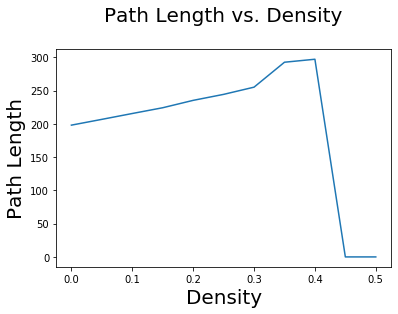

Time took: 14.45252513885498


In [1159]:
prob = np.linspace(0,0.5,11)
lenAstarM=[]
Listtemp=[]
start_time = time.time()
for item in prob:
    for x in range(0,100):
        temp = AstarM(grid(100, item), video=False)
        if temp[0] == 0:
            pass
        else:
            Listtemp.append(temp[1])
    if len(Listtemp) == 0:
        lenAstarM.append(0)
    else:
        lenAstarM.append(sum(Listtemp)/len(Listtemp))
    print(item)
    Listtemp=[]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.xlabel('Density',fontsize=20)
plt.ylabel('Path Length',fontsize=20)
plt.title("Path Length vs. Density\n", fontsize = 20)
plt.plot(prob, lenAstarM,linewidth=1.5)
plt.show()
print("Time took:", (time.time() - start_time))

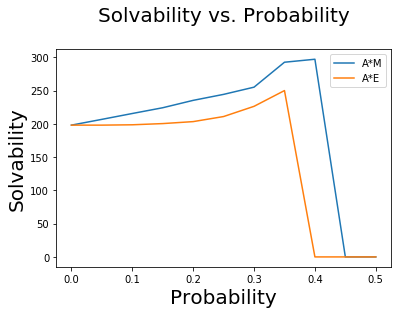

In [1161]:
plt.xlabel('Probability',fontsize=20)
plt.ylabel('Solvability',fontsize=20)
plt.title("Solvability vs. Probability\n", fontsize = 20)
plt.plot(prob, lenAstarM, label = 'A*M')
plt.plot(prob, lenAstarE, label = 'A*E')
plt.legend(loc='upper right')
plt.show()

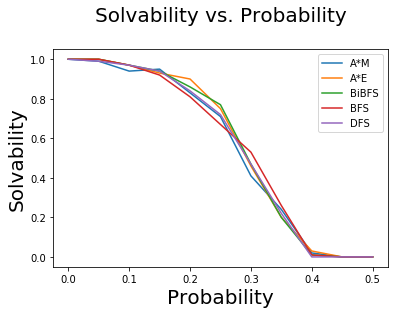

In [1154]:
plt.xlabel('Probability',fontsize=20)
plt.ylabel('Solvability',fontsize=20)
plt.title("Solvability vs. Probability\n", fontsize = 20)
plt.plot(prob, solvAstarM, label = 'A*M')
plt.plot(prob, solvAstarE, label = 'A*E')
plt.plot(prob, solvBiBFS, label = 'BiBFS')
plt.plot(prob, solvBFS, label = 'BFS')
plt.plot(prob, solvDFS, label = 'DFS')
plt.legend(loc='upper right')
plt.show()


In [1045]:
#DFS Search Algorithm

def DFS(maze, video):
    #initialize the solved state of the maze to be false and our pointers to be at the beginning
    #i controls row and j controls column
    maze_final = np.copy(maze)
    solved = False
    i, j = 0, 0
    prev = {}
    
    #initialize the fringe and store the starting point of the maze
    fringe = []
    fringe.append([i, j])
    
    #runs until we reach the end
    while solved == False:
        '''
        #*****this is just for debugging*****
        
        #print out the length of the current fringe
        print(queue.Queue.qsize(fringe))
            
        #looks at the queue
        for q_item in fringe.queue:
            print(q_item)
        '''
        
        #Is the maze unsolvable?
        if len(fringe) == 0:
            #update the state of the maze, display the end result, and break the loop
            update(maze, i , j)
            if video == True:
                plt.imshow(maze, cmap=plt.cm.binary)
                plt.show()
            #print("UNSOLVABLE")
            #value to be returned for later analysis
            solved = 0
            solution_length = 0
            break
            
        #gets the current node and update i and j
        current = fringe.pop()
        i, j = current[0], current[1]
        
        #check if we have reached a solution, display the end result, and break the loop
        if i + 1 == len(maze) and j + 1 == len(maze[i]):
            update(maze, i , j)
            if video == True:
                plt.imshow(maze, cmap=plt.cm.binary)
                plt.pause(0.05)
            #print("SOLUTION FOUND")
            #value to be returned for later analysis
            solved = 1
            
            solution_length = 0
            
            update(maze_final, i, j)
            if video == True:
                plt.imshow(maze, cmap=plt.cm.binary)
                plt.pause(0.05)
            
            while i != 0 or j!= 0:
                x = prev[i,j]
                i, j = x[0], x[1]
                update(maze_final, i, j)
                if video == True:
                    plt.imshow(maze_final, cmap=plt.cm.binary)
                    plt.pause(0.05)
                solution_length += 1
            
            update(maze_final, 0, 0)
            if video == True:
                plt.imshow(maze_final, cmap=plt.cm.binary)
                plt.pause(0.05)
            
            break
            
        #check left solution
        
        #are we outside?
        if j - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i][j - 1] == 1 or maze[i][j - 1] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [i, j - 1] in fringe:
                    pass
                else:
                    prev[(i, j - 1)] = (i, j)
                    fringe.append([i, j - 1])
                    
        #check up solution
        
        #are we outside?
        if i - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i - 1][j] == 1 or maze[i - 1][j] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [i - 1, j] in fringe:
                    pass
                else:
                    prev[(i - 1, j)] = (i, j)
                    fringe.append([i - 1, j])
                    
        #check right position
        
        #are we outside?
        if j + 1 >= len(maze[i]):
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i][j + 1] == 1 or maze[i][j + 1] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [i, j + 1] in fringe:
                    pass
                else:
                    prev[(i, j + 1)] = (i, j)
                    fringe.append([i, j + 1])
        
        #check down position
        
        #are we outside?
        if i + 1 >= len(maze):
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i + 1][j] == 1 or maze[i + 1][j] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [i + 1, j] in fringe:
                    pass
                else:
                    prev[(i + 1, j)] = (i, j)
                    fringe.append([i + 1, j])        
        
        
        
        #after done checking, update the maze and start over
        update(maze, i, j)
        
        if video == True:
            plt.imshow(maze, cmap=plt.cm.binary)
            plt.pause(0.05)

    if video == True:
        plt.show()
        
    return solved, solution_length

In [910]:
x, y = DFS(grid(100, 0.3), video = False)

SOLUTION FOUND


In [911]:
print(x, y)

1 270


In [1133]:
#A* Euclidean Distance

def AstarE(maze, video):
    #initialize the solved state of the maze to be false and our pointers to be at the beginning
    #i controls row and j controls column
    maze_final = np.copy(maze)
    solved = False
    i, j = 0, 0
    prev = {}
    counter = 0
    
    #initialize the fringe and store the starting point of the maze
    fringe = []
    fringe.append([i, j, counter + Euclidean(maze, i, j)])
    
    #runs until we reach the end
    while solved == False:
        '''
        #*****this is just for debugging*****
        
        #print out the length of the current fringe
        print(queue.Queue.qsize(fringe))
            
        #looks at the queue
        for q_item in fringe.queue:
            print(q_item)
        '''
        #Is the maze unsolvable?
        if len(fringe) == 0:
            #update the state of the maze, display the end result, and break the loop
            update(maze, i , j)
            if video == True:
                plt.imshow(maze, cmap=plt.cm.binary)
                plt.show()
            #print("UNSOLVABLE")
            #value to be returned for later analysis
            solved = 0
            solution_length = 0
            break
            
        #gets the current node and update i and j
        current = fringe.pop()
        i, j = current[0], current[1]
        
        #check if we have reached a solution, display the end result, and break the loop
        if i + 1 == len(maze) and j + 1 == len(maze[i]):
            update(maze, i , j)
            if video == True:
                plt.imshow(maze, cmap=plt.cm.binary)
                plt.pause(0.05)
            #print("SOLUTION FOUND")
            #value to be returned for later analysis
            solved = 1
            
            solution_length = 0
            
            update(maze_final, i, j)
            if video == True:
                plt.imshow(maze, cmap=plt.cm.binary)
                plt.pause(0.05)
            
            while i != 0 or j!= 0:
                x = prev[i,j]
                i, j = x[0], x[1]
                update(maze_final, i, j)
                if video == True:
                    plt.imshow(maze_final, cmap=plt.cm.binary)
                    plt.pause(0.05)
                solution_length += 1
            
            update(maze_final, 0, 0)
            
            if video == True:
                plt.imshow(maze_final, cmap=plt.cm.binary)
                plt.pause(0.05)
                
            break
       
        #check left solution
        
        #are we outside?
        if j - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i][j - 1] == 1 or maze[i][j - 1] == 0.5:
                #If so, move on
                pass
            else:
                #check if already in fringe
                if (i, j - 1, counter + Euclidean(maze, i, j - 1)) in fringe:
                    pass
                else:
                    #if the fringe was empty (i.e. the first move), just add the first child to fringe
                    if len(fringe) == 0: 
                        prev[(i, j - 1)] = (i, j)
                        fringe.append((i, j - 1, counter + Euclidean(maze, i, j - 1)))
                    #if the fringe is not empty, check the f(n) value and compare with items in fringe
                    else:
                        for x in range(len(fringe)-1,-1,-1): 
                            if counter + Euclidean(maze, i, j - 1) > fringe[x][2]:
                                if x == 0:
                                    fringe.insert(x, (i, j - 1, counter + Euclidean(maze, i, j - 1)))
                                    prev[(i, j - 1)] = (i, j)
                                else: 
                                    pass
                            else: 
                                fringe.insert(x + 1, (i, j - 1, counter + Euclidean(maze, i, j - 1)))
                                prev[(i, j - 1)] = (i, j)
                                break
                                
                                
        #check up solution
        
        #are we outside?
        if i - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i - 1][j] == 1 or maze[i - 1][j] == 0.5:
                pass
            else:
                #check if already in fringe
                if (i - 1, j, counter + Euclidean(maze, i - 1, j)) in fringe:
                    pass
                else:
                    #if the fringe was empty (i.e. the first move), just add the first child to fringe
                    if len(fringe) == 0: 
                        prev[(i - 1, j)] = (i, j)
                        fringe.append((i - 1, j, counter + Euclidean(maze, i - 1, j)))
                    #if the fringe is not empty, check the f(n) value and compare with items in fringe
                    else:
                        for x in range(len(fringe)-1,-1,-1): 
                            if counter + Euclidean(maze, i - 1, j) > fringe[x][2]:
                                if x == 0:
                                    fringe.insert(x, (i - 1, j, counter + Euclidean(maze, i - 1, j)))
                                    prev[(i - 1, j)] = (i, j)
                                else: 
                                    pass
                            else: 
                                fringe.insert(x + 1, (i - 1, j, counter + Euclidean(maze, i - 1, j)))
                                prev[(i - 1, j)] = (i, j)
                                break
        #check right position
        
        #are we outside?
        if j + 1 >= len(maze[i]):
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i][j + 1] == 1 or maze[i][j + 1] == 0.5:
                pass
            else:
                #check if already in fringe
                if (i, j + 1, counter + Euclidean(maze, i, j + 1)) in fringe:
                    pass
                else:
                    #if the fringe was empty (i.e. the first move), just add the first child to fringe
                    if len(fringe) == 0: 
                        prev[(i, j + 1)] = (i, j)
                        fringe.append((i, j + 1, counter + Euclidean(maze, i, j + 1)))
                    #if the fringe is not empty, check the f(n) value and compare with items in fringe
                    else:
                        for x in range(len(fringe)-1,-1,-1): 
                            if counter + Euclidean(maze, i, j + 1) > fringe[x][2]:
                                if x == 0:
                                    fringe.insert(x, (i, j + 1, counter + Euclidean(maze, i, j + 1)))
                                    prev[(i, j + 1)] = (i, j)
                                else: 
                                    pass
                            else: 
                                fringe.insert(x + 1, (i, j + 1, counter + Euclidean(maze, i, j + 1)))
                                prev[(i, j + 1)] = (i, j)
                                break
        
        #check down position
        
        #are we outside?
        if i + 1 >= len(maze):
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i + 1][j] == 1 or maze[i + 1][j] == 0.5:
                pass
            else:
                #check if already in fringe
                if (i + 1, j, counter + Euclidean(maze, i + 1, j)) in fringe:
                    pass
                else:
                    #if the fringe was empty (i.e. the first move), just add the first child to fringe
                    if len(fringe) == 0: 
                        prev[(i + 1, j)] = (i, j)
                        fringe.append((i + 1, j, counter + Euclidean(maze, i + 1, j)))
                    #if the fringe is not empty, check the f(n) value and compare with items in fringe
                    else:
                        for x in range(len(fringe)-1,-1,-1): 
                            if counter + Euclidean(maze, i + 1, j) > fringe[x][2]:
                                if x == 0:
                                    fringe.insert(x, (i + 1, j, counter + Euclidean(maze, i + 1, j)))
                                    prev[(i + 1, j)] = (i, j)
                                else: 
                                    pass
                            else: 
                                fringe.insert(x + 1, (i + 1, j, counter + Euclidean(maze, i + 1, j)))
                                prev[(i + 1, j)] = (i, j)
                                break        
        
        
        
        #after done checking, update the maze and start over
        update(maze, i, j)
        
        if video == True:
            plt.imshow(maze, cmap=plt.cm.binary)
            plt.pause(0.05)
    if video == True:
        plt.show()
        
    return solved, solution_length

In [1134]:
x, y = AstarE(grid(10, 0.3), video = False)

In [944]:
print(x,y)

1 234


In [1135]:
#A* Manhattan Distance

def AstarM(maze, video):
    #initialize the solved state of the maze to be false and our pointers to be at the beginning
    #i controls row and j controls column
    maze_final = np.copy(maze)
    solved = False
    i, j = 0, 0
    prev = {}
    counter = 0
    
    #initialize the fringe and store the starting point of the maze
    fringe = []
    fringe.append([i, j, counter + Manhattan(maze, i, j)])
    
    
    #runs until we reach the end
    while solved == False:
        '''
        #*****this is just for debugging*****
        
        #print out the length of the current fringe
        print(queue.Queue.qsize(fringe))
            
        #looks at the queue
        for q_item in fringe.queue:
            print(q_item)
        '''
        
        #Is the maze unsolvable?
        if len(fringe) == 0:
            #update the state of the maze, display the end result, and break the loop
            update(maze, i , j)
            if video == True:
                plt.imshow(maze, cmap=plt.cm.binary)
                plt.show()
            #print("UNSOLVABLE")
            #value to be returned for later analysis
            solved = 0
            solution_length = 0
            break
            
        #gets the current node and update i and j
        current = fringe.pop()
        i, j = current[0], current[1]
        
        #check if we have reached a solution, display the end result, and break the loop
        if i + 1 == len(maze) and j + 1 == len(maze[i]):
            update(maze, i , j)
            if video == True:
                plt.imshow(maze, cmap=plt.cm.binary)
                plt.pause(0.05)
            #print("SOLUTION FOUND")
            #value to be returned for later analysis
            solved = 1
            
            solution_length = 0
            
            update(maze_final, i, j)
            if video == True:
                plt.imshow(maze, cmap=plt.cm.binary)
                plt.pause(0.05)
            
            while i != 0 or j!= 0:
                x = prev[i,j]
                i, j = x[0], x[1]
                update(maze_final, i, j)
                if video == True:
                    plt.imshow(maze_final, cmap=plt.cm.binary)
                    plt.pause(0.05)
                solution_length += 1
            
            update(maze_final, 0, 0)
            if video == True:
                plt.imshow(maze_final, cmap=plt.cm.binary)
                plt.pause(0.05)
                
            break
       
        #check left solution
        
        #are we outside?
        if j - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i][j - 1] == 1 or maze[i][j - 1] == 0.5:
                #If so, move on
                pass
            else:
                #check if already in fringe
                if (i, j - 1, counter + Manhattan(maze, i, j - 1)) in fringe:
                    pass
                else:
                    #if the fringe was empty (i.e. the first move), just add the first child to fringe
                    if len(fringe) == 0: 
                        prev[(i, j - 1)] = (i, j)
                        fringe.append((i, j - 1, counter + Manhattan(maze, i, j - 1)))
                    #if the fringe is not empty, check the f(n) value and compare with items in fringe
                    else:
                        for x in range(len(fringe)-1,-1,-1): 
                            if counter + Manhattan(maze, i, j - 1) > fringe[x][2]:
                                if x == 0:
                                    fringe.insert(0, (i, j - 1, counter + Manhattan(maze, i, j - 1)))
                                    prev[(i, j - 1)] = (i, j)
                                else:
                                    pass
                            else: 
                                fringe.insert(x + 1, (i, j - 1, counter + Manhattan(maze, i, j - 1)))
                                prev[(i, j - 1)] = (i, j)
                                break
                                
        #check up solution
        
        #are we outside?
        if i - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i - 1][j] == 1 or maze[i - 1][j] == 0.5:
                pass
            else:
                #check if already in fringe
                if (i - 1, j, counter + Manhattan(maze, i - 1, j)) in fringe:
                    pass
                else:
                    #if the fringe was empty (i.e. the first move), just add the first child to fringe
                    if len(fringe) == 0: 
                        prev[(i - 1, j)] = (i, j)
                        fringe.append((i - 1, j, counter + Manhattan(maze, i - 1, j)))
                    #if the fringe is not empty, check the f(n) value and compare with items in fringe
                    else:
                        for x in range(len(fringe)-1,-1,-1): 
                            if counter + Manhattan(maze, i - 1, j) > fringe[x][2]:
                                if x == 0:
                                    fringe.insert(0, (i - 1, j, counter + Manhattan(maze, i - 1, j)))
                                    prev[(i - 1, j)] = (i, j)
                                else: 
                                    pass
                            else: 
                                fringe.insert(x + 1, (i - 1, j, counter + Manhattan(maze, i - 1, j)))
                                prev[(i - 1, j)] = (i, j)
                                break
        #check right position
        
        #are we outside?
        if j + 1 >= len(maze[i]):
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i][j + 1] == 1 or maze[i][j + 1] == 0.5:
                pass
            else:
                #check if already in fringe
                if (i, j + 1, counter + Manhattan(maze, i, j + 1)) in fringe:
                    pass
                else:
                    #if the fringe was empty (i.e. the first move), just add the first child to fringe
                    if len(fringe) == 0: 
                        prev[(i, j + 1)] = (i, j)
                        fringe.append((i, j + 1, counter + Manhattan(maze, i, j + 1)))
                    #if the fringe is not empty, check the f(n) value and compare with items in fringe
                    else:
                        for x in range(len(fringe)-1,-1,-1): 
                            if counter + Manhattan(maze, i, j + 1) > fringe[x][2]:
                                if x == 0:
                                    fringe.insert(0, (i, j + 1, counter + Manhattan(maze, i, j + 1)))
                                    prev[(i, j + 1)] = (i, j)
                                else: 
                                    pass
                            else: 
                                fringe.insert(x + 1, (i, j + 1, counter + Manhattan(maze, i, j + 1)))
                                prev[(i, j + 1)] = (i, j)
                                break
                                

        
        #check down position
        
        #are we outside?
        if i + 1 >= len(maze):
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i + 1][j] == 1 or maze[i + 1][j] == 0.5:
                pass
            else:
                #check if already in fringe
                if (i + 1, j, counter + Manhattan(maze, i + 1, j)) in fringe:
                    pass
                else:
                    #if the fringe was empty (i.e. the first move), just add the first child to fringe
                    if len(fringe) == 0: 
                        prev[(i + 1, j)] = (i, j)
                        fringe.append((i + 1, j, counter + Manhattan(maze, i + 1, j)))
                    #if the fringe is not empty, check the f(n) value and compare with items in fringe
                    else:
                        for x in range(len(fringe)-1,-1,-1): 
                            if counter + Manhattan(maze, i + 1, j) > fringe[x][2]:
                                if x == 0:
                                    fringe.insert(0, (i + 1, j, counter + Manhattan(maze, i + 1, j)))
                                    prev[(i + 1, j)] = (i, j)
                                else: 
                                    pass
                            else: 
                                fringe.insert(x + 1, (i + 1, j, counter + Manhattan(maze, i + 1, j)))
                                prev[(i + 1, j)] = (i, j)
                                break        
        
        
        
        #after done checking, update the maze and start over
        update(maze, i, j)
        
        if video == True:
            plt.imshow(maze, cmap=plt.cm.binary)
            plt.pause(0.05)
    if video == True:
        plt.show()
        
    return solved, solution_length

In [1136]:
x, y = AstarM(grid(100, 0.3), video = False)

In [948]:
print(x,y)

1 284


In [1057]:
#Bi-Directional BFS

def BiBFS(maze, video):
    #initialized state is set to false
    #i,j-->row,column from start m,n-->row,column from end
    maze_final=np.copy(maze)
    solved=False
    i,j=0,0
    m,n=len(maze)-1,len(maze[0])-1
    prev={}
    prev2={}
    
    #initialize fringe for starting point and fringe from ending point
    fringeStart=queue.Queue()
    fringeStart.put([i,j])
    fringeEnd=queue.Queue()
    fringeEnd.put([m,n])
    
    #run loop until start and end meet or no solution
    while solved==False:
        #if maze is still unsolved and there are no more children left in fringe, maze is unsolvable
        if (queue.Queue.qsize(fringeStart)==0 or queue.Queue.qsize(fringeEnd)==0):
            #update state of maze, display result, then break loop
            update(maze,i,j)
            update(maze,m,n)
            if video == True:
                plt.imshow(maze, cmap=plt.cm.binary)
                plt.pause(0.05)
            #print("UNSOLVABLE")
            #value to be returned for later analysis
            solved = 0
            solution_length = 0
            break
            
        #gets current node and updates i,j and m,n
        currentStart=fringeStart.get()
        currentEnd=fringeEnd.get()
        i,j=currentStart[0],currentStart[1]
        m,n=currentEnd[0],currentEnd[1]
        
        #check if start and end meet in middle,display result, then break loop
        if (i+1,j) in prev2:
            m, n = i+1, j
            solved = True
            
        if (i,j+1) in prev2:
            m, n = i, j+1
            solved = True
            
        if (i-1,j) in prev2:
            m, n = i-1, j
            solved = True
            
        if (i,j-1) in prev2:
            m,n = i, j-1
            solved = True
        
        if solved == True:
            update(maze,i,j)
            update(maze,m,n)
            if video == True:
                plt.imshow(maze, cmap=plt.cm.binary)
                plt.pause(0.05)
            #print("SOLUTION FOUND")
            #value to be returned for later analysis
            solved = 1
            solution_length = 1
            
            update(maze_final,i,j)
            update(maze_final,m,n)
            if video == True:
                plt.imshow(maze_final, cmap=plt.cm.binary)
                plt.pause(0.05)

            while True:
                if i==0 and j==0 and m==len(maze)-1 and n==len(maze[0])-1:
                    break

                if (i,j) == (0,0):
                    y=prev2[(m,n)]
                    m,n=y[0],y[1]
                    update(maze_final,m,n)
                    if video == True:
                        plt.imshow(maze_final, cmap=plt.cm.binary)
                        plt.pause(0.05)
                        
                    solution_length += 1
                    
                elif (m,n) == (len(maze)-1, len(maze[0])-1):
                    x=prev[(i,j)]
                    i,j=x[0],x[1]
                    update(maze_final,i,j)
                    update(maze_final,m,n)
                    if video == True:
                        plt.imshow(maze_final, cmap=plt.cm.binary)
                        plt.pause(0.05)
                        
                    solution_length += 1
                    
                else:
                    x=prev[(i,j)]
                    y=prev2[(m,n)]
                    i,j=x[0],x[1]
                    m,n=y[0],y[1]
                    update(maze_final,i,j)
                    update(maze_final,m,n)
                    if video == True:
                        plt.imshow(maze_final, cmap=plt.cm.binary)
                        plt.pause(0.05)
                        
                    solution_length += 2
                        

            update(maze_final,0,0)
            update(maze_final,len(maze)-1,len(maze[0])-1)
            if video == True:
                plt.imshow(maze_final, cmap=plt.cm.binary)
                plt.pause(0.05)

            break
            
        #check down position of i,j
        if i + 1 >= len(maze):
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i + 1][j] == 1 or maze[i + 1][j] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [i + 1, j] in fringeStart.queue:
                    pass
                else:
                    prev[(i + 1, j)] = (i, j)
                    fringeStart.put([i + 1, j])
                    
        #check up position of m,n
        if m - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[m - 1][n] == 1 or maze[m - 1][n] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [m - 1, n] in fringeEnd.queue:
                    pass
                else:
                    prev2[(m - 1, n)] = (m, n)
                    fringeEnd.put([m - 1, n])
                    
        #check right position of i,j
        if j + 1 >= len(maze[i]):
            pass
        else:
            #is the next position occupied or iously visited?
            if maze[i][j + 1] == 1 or maze[i][j + 1] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [i, j + 1] in fringeStart.queue:
                    pass
                else:
                    prev[(i, j + 1)] = (i, j)
                    fringeStart.put([i, j + 1])
                    
        #check left position of m,n
        if n - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[m][n - 1] == 1 or maze[m][n - 1] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [m, n - 1] in fringeEnd.queue:
                    pass
                else:
                    prev2[(m, n - 1)] = (m, n)
                    fringeEnd.put([m, n - 1])
                    
        #check up position of i,j
        if i - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i - 1][j] == 1 or maze[i - 1][j] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [i - 1, j] in fringeStart.queue:
                    pass
                else:
                    prev[(i - 1, j)] = (i, j)
                    fringeStart.put([i - 1, j])
                    
        #check down position of m,n
        if m + 1 >= len(maze):
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[m + 1][n] == 1 or maze[m + 1][n] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [m + 1, n] in fringeEnd.queue:
                    pass
                else:
                    prev2[(m + 1, n)] = (m, n)
                    fringeEnd.put([m + 1, n])
                    
        #check left position of i,j
        if j - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i][j - 1] == 1 or maze[i][j - 1] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [i, j - 1] in fringeStart.queue:
                    pass
                else:
                    prev[(i, j - 1)] = (i, j)
                    fringeStart.put([i, j - 1])
                    
        #check right position of m,n
        if n + 1 >= len(maze[m]):
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[m][n + 1] == 1 or maze[m][n + 1] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [m, n + 1] in fringeEnd.queue:
                    pass
                else:
                    prev2[(m, n + 1)] = (m, n)
                    fringeEnd.put([m, n + 1])
                    
        #after done checking, update maze and start over
        update(maze, i, j)
        update(maze,m,n)
        if video == True:
            plt.imshow(maze, cmap=plt.cm.binary)
            plt.pause(0.05)
    if video == True:        
        plt.show()
    return solved, solution_length

In [1005]:
x, y = BiBFS(grid(100, 0.4), video = False)

UNSOLVABLE


In [1003]:
print(x,y)

1 22


In [1203]:
a = grid(100, 0.2)
b = np.copy(a)
c = np.copy(a)
d = np.copy(a)
e = np.copy(a)

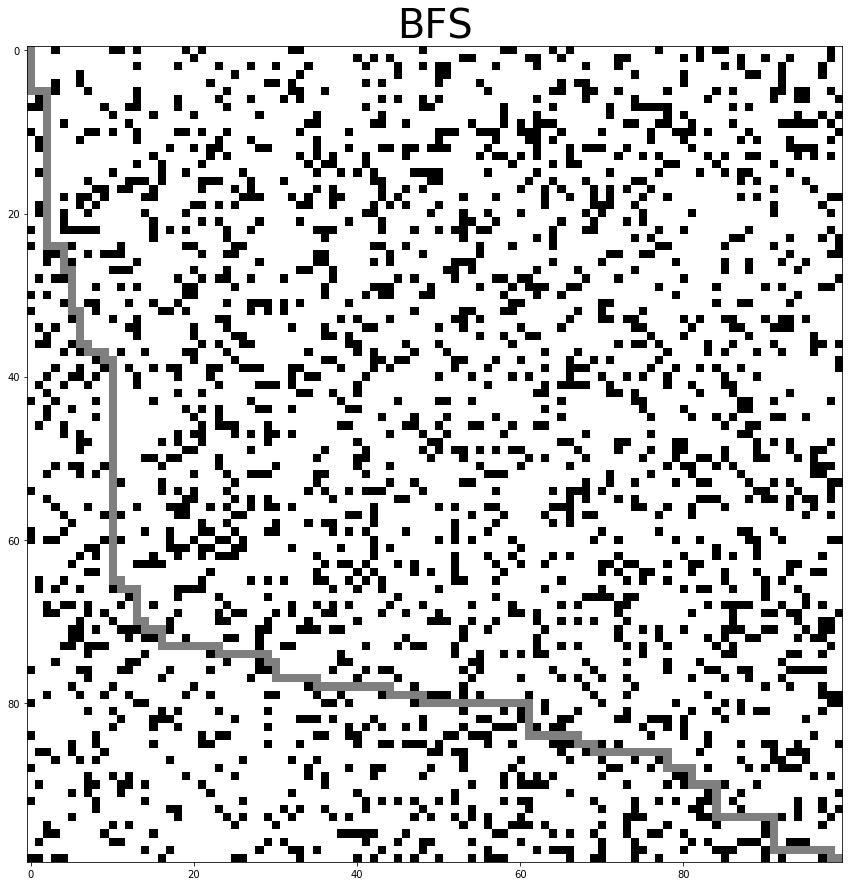

(1, 198)

In [1204]:
BFS(a, video = False)

0
1 3


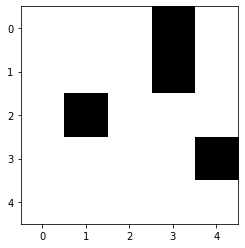

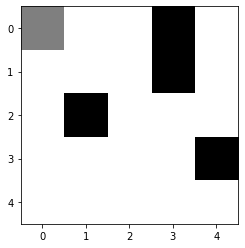

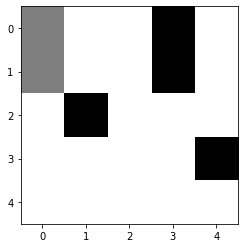

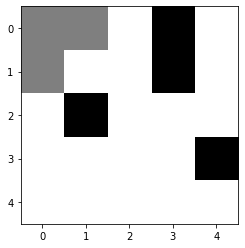

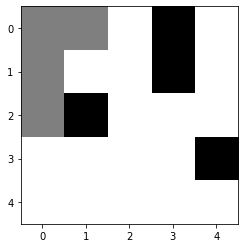

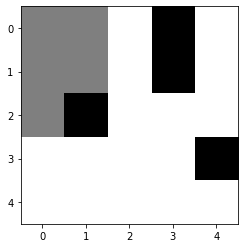

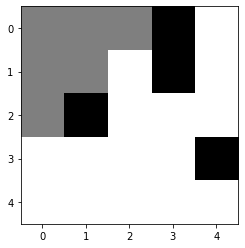

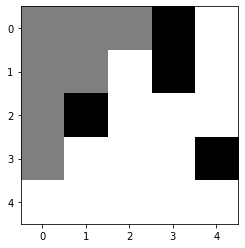

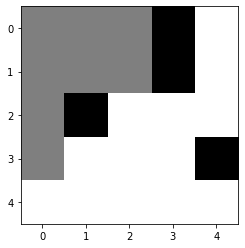

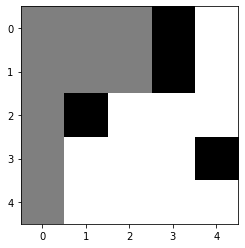

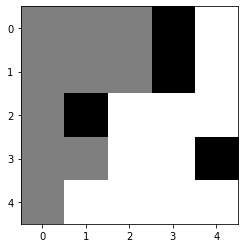

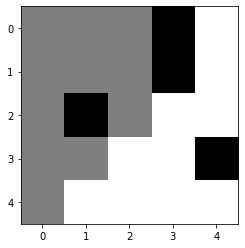

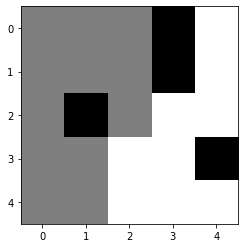

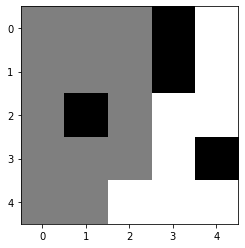

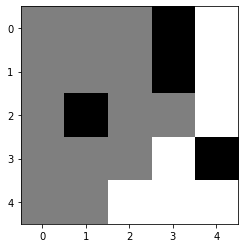

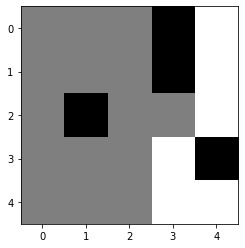

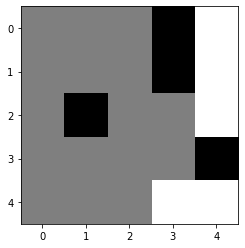

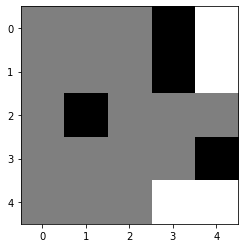

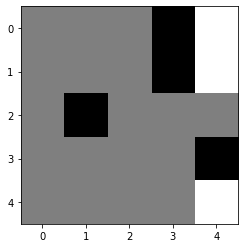

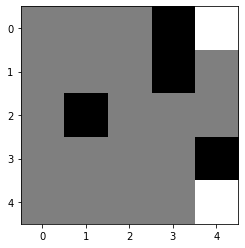

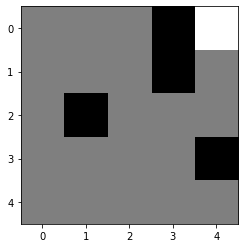

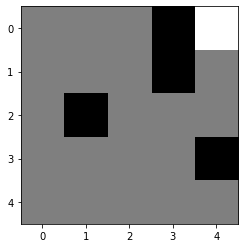

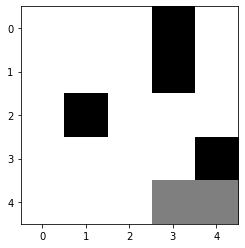

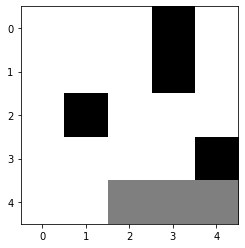

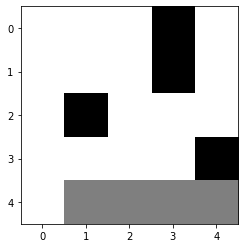

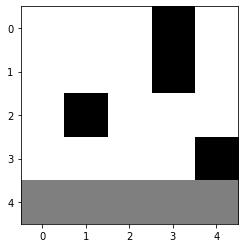

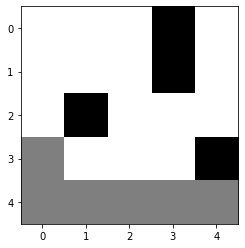

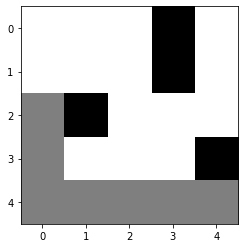

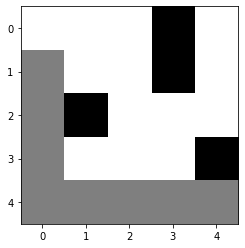

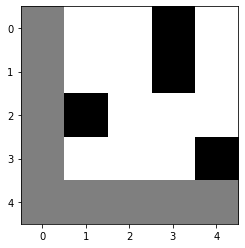

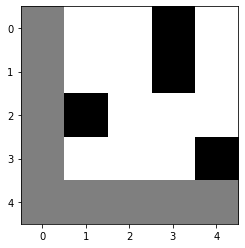

1
3 2


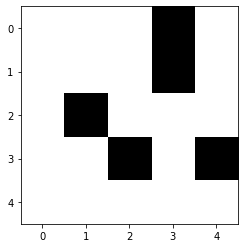

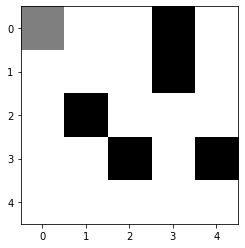

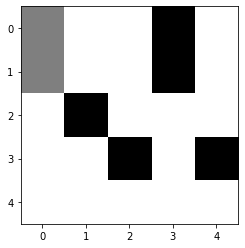

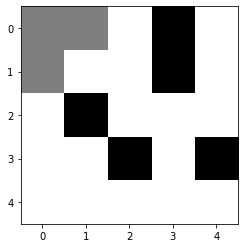

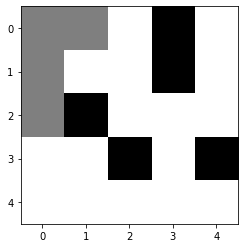

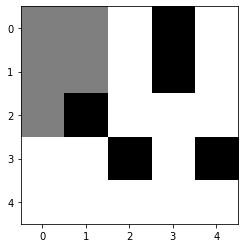

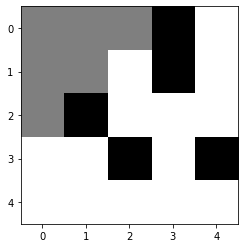

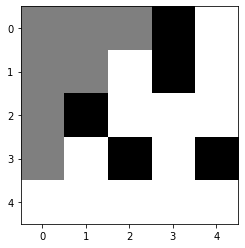

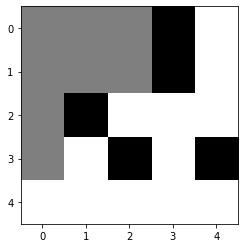

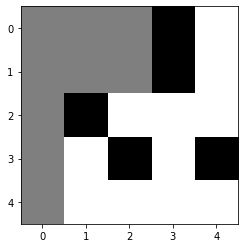

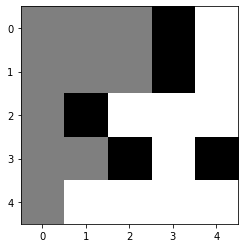

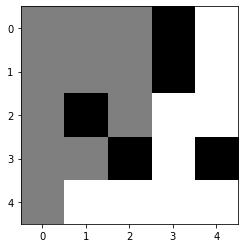

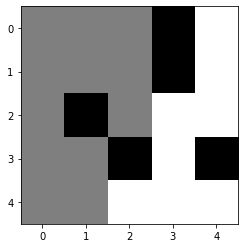

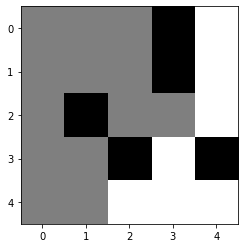

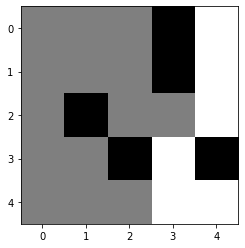

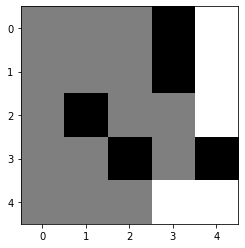

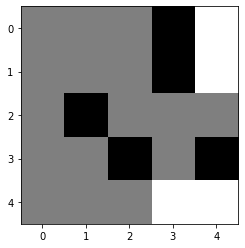

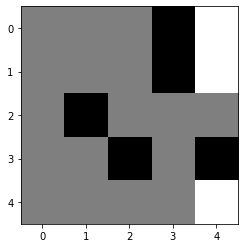

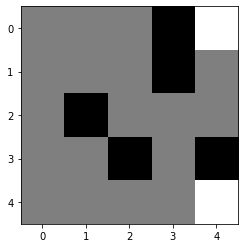

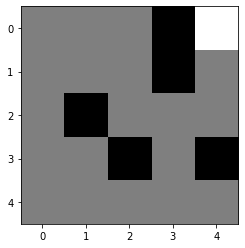

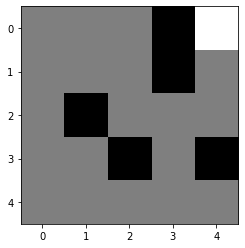

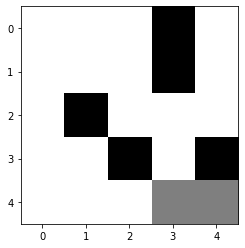

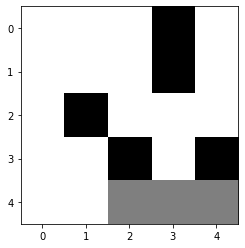

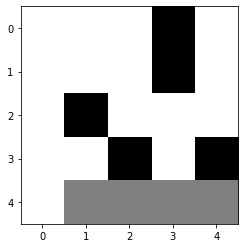

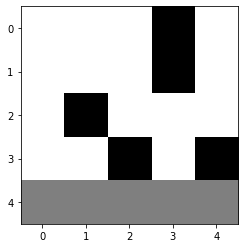

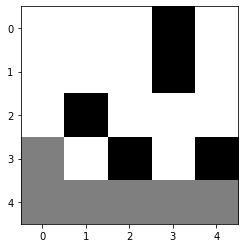

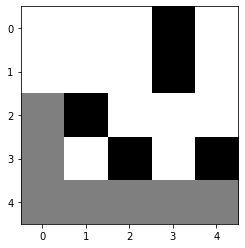

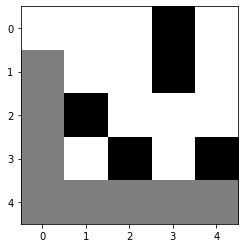

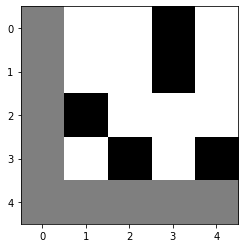

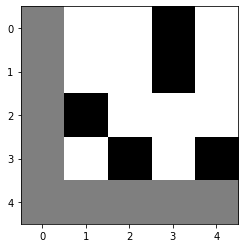

2
1 1


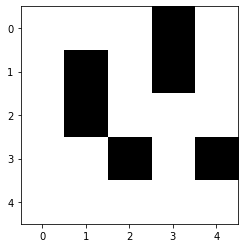

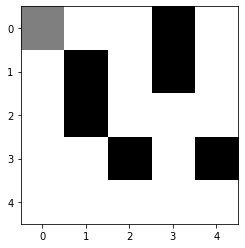

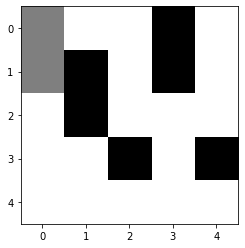

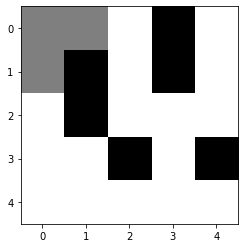

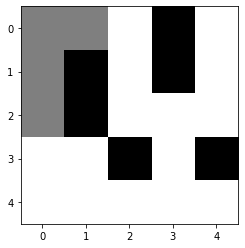

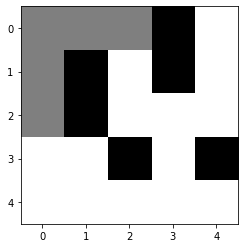

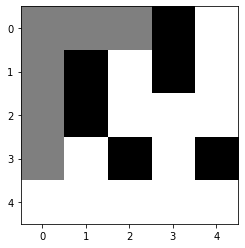

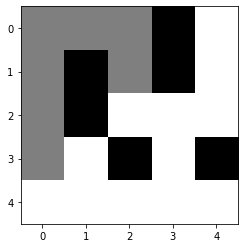

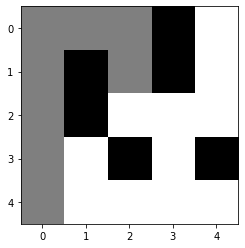

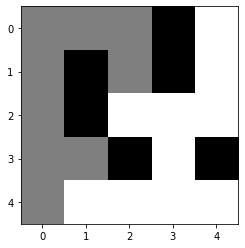

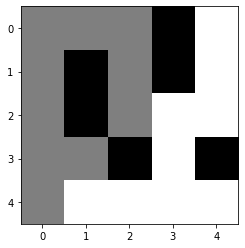

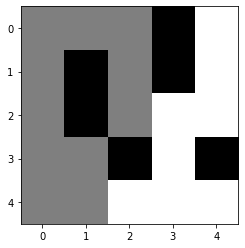

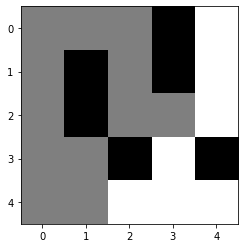

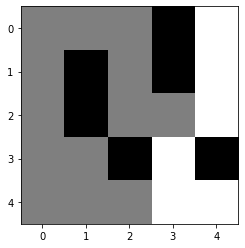

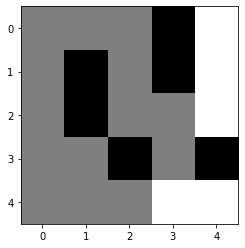

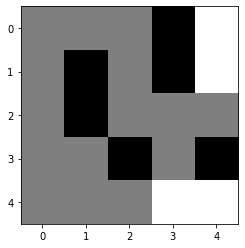

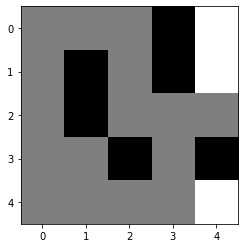

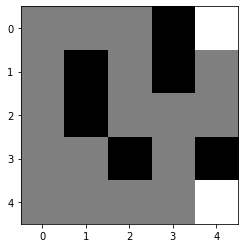

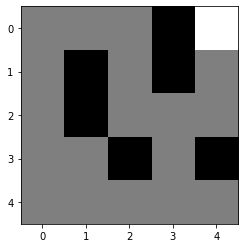

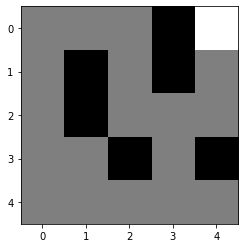

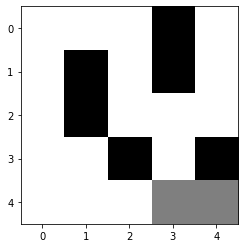

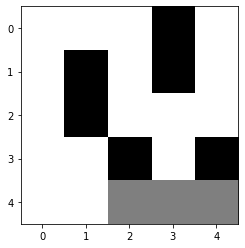

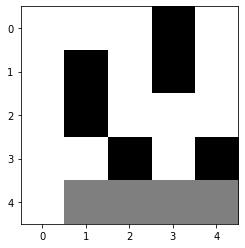

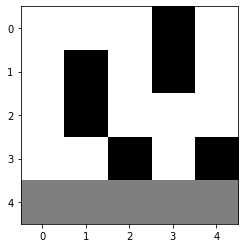

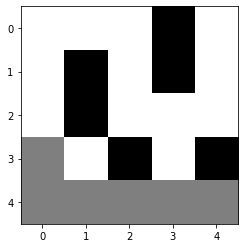

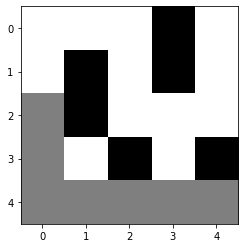

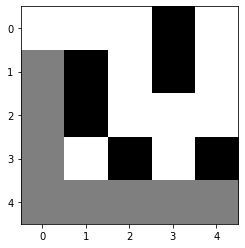

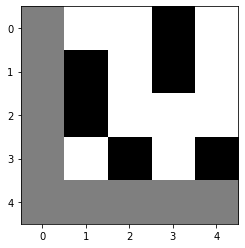

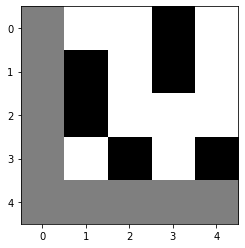

3
3 1


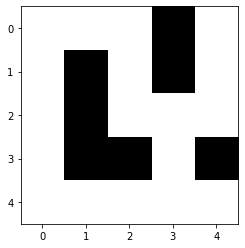

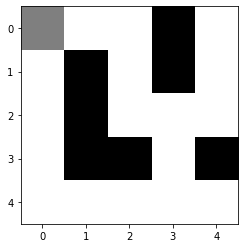

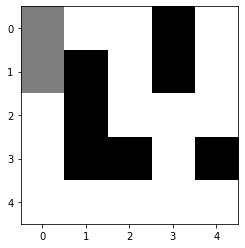

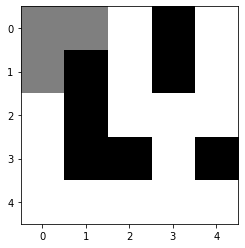

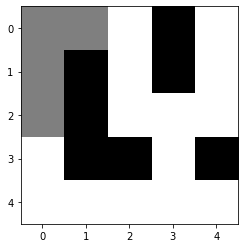

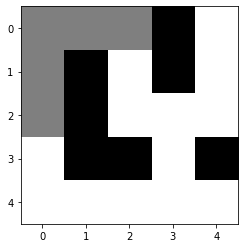

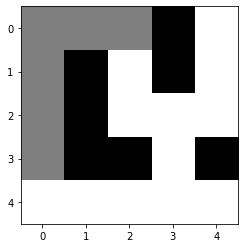

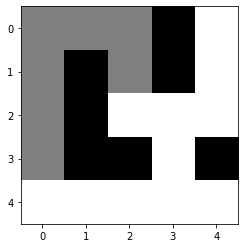

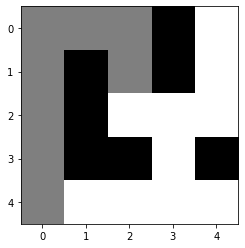

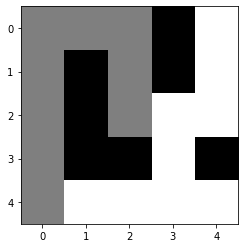

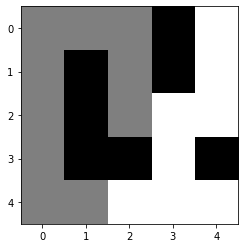

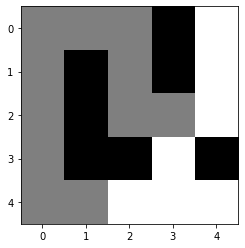

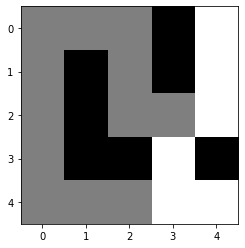

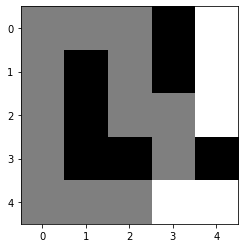

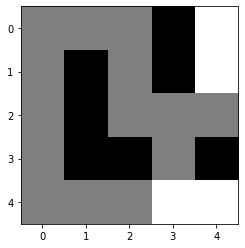

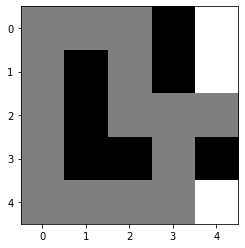

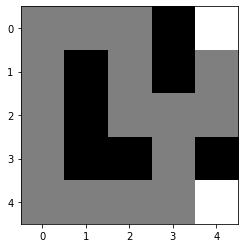

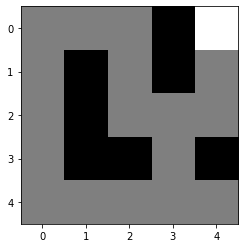

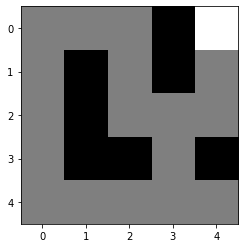

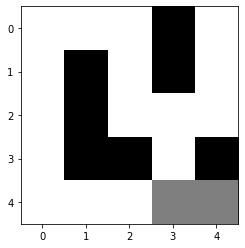

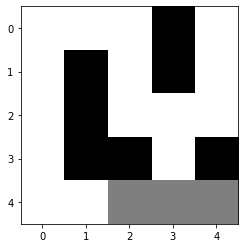

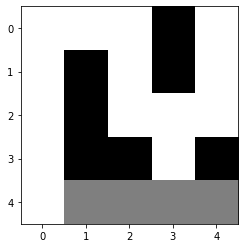

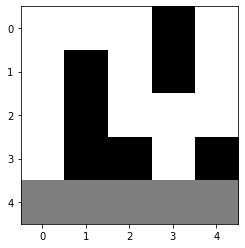

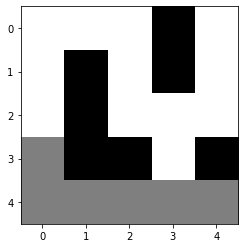

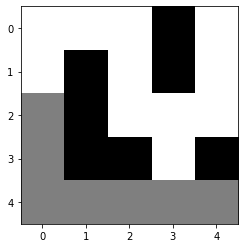

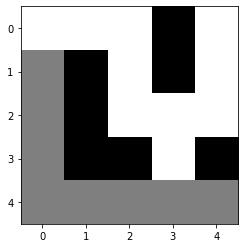

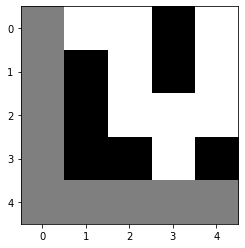

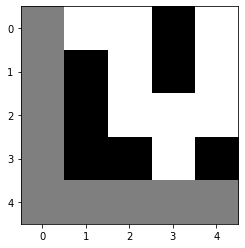

4
1 2


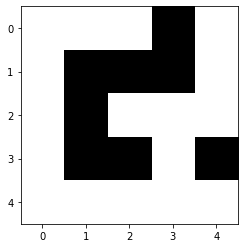

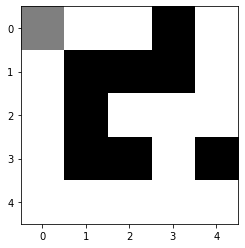

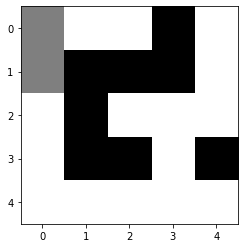

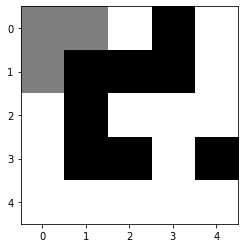

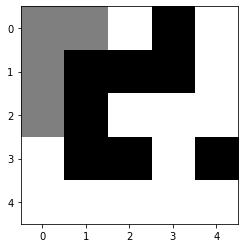

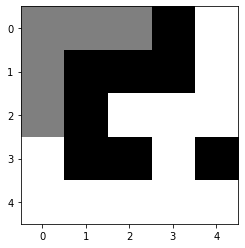

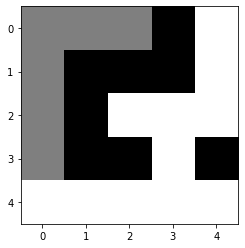

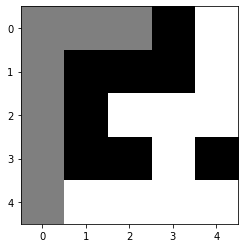

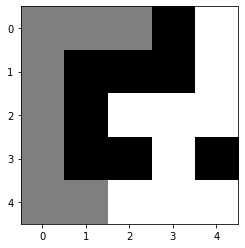

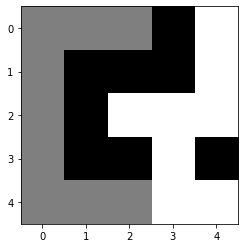

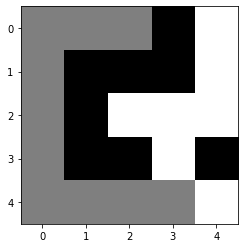

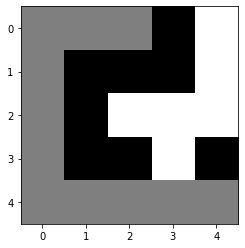

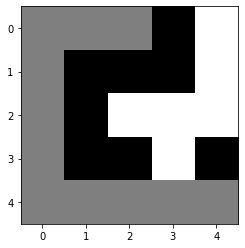

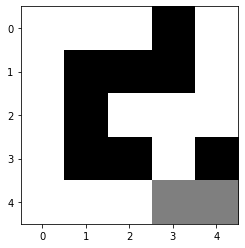

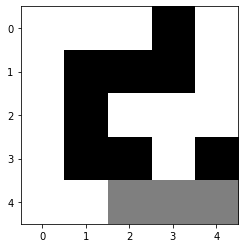

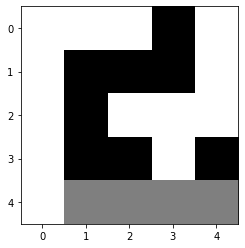

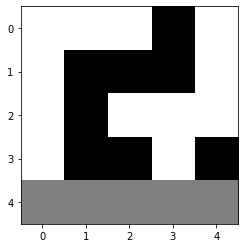

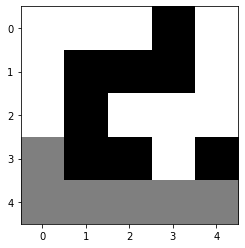

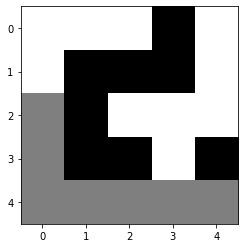

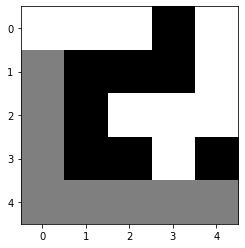

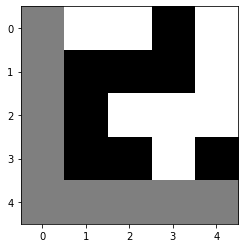

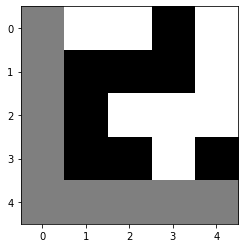

5
no solution
no solution
no solution
no solution
no solution
None


In [1243]:
#maze is filled with empty and obstacles
def randomWalk(maze,times_changed):
    print(times_changed)
    if times_changed > 4:
        return maze
    else:
        mazeOriginal=np.copy(maze)
        maze2 = np.copy(maze)
        #call BFS with original maze
        x=BFS(maze2,video=False)
        pathLength1=x[1]
        #if BFS is solvable
        if x[0]==1:
            y=random.random()
            #add obstacle
            if y > 0:
                while True:
                    i=random.randint(1,len(maze)-2)
                    j=random.randint(1,len(maze)-2)
                    #if we pick obstacle, pass
                    if maze[i][j]==1:
                        pass
                    #empty cell selected
                    else:
                        #obstacle added in blank cell
                        print(i, j)
                        maze[i][j]=1
                        mazeEdited=np.copy(maze)
                        break
            #delete obstacle
            else:
                while True:
                    m=random.randint(1,len(maze)-2)
                    n=random.randint(1,len(maze)-2)
                    #if we pick empty cell,pass
                    if maze[m][n]==0:
                        pass
                    #obstcle cell selected
                    else:
                        #obstcle deleted from obstacle cell
                        print(m, n)
                        maze[m][n]=0
                        mazeEdited=np.copy(maze)
                        break
            
            #call BFS with new maze
            y=BFS(mazeEdited,video=True)
            #path length of edited maze
            pathLength2=y[1]
            if pathLength2>=pathLength1:
                times_changed += 1
                randomWalk(maze,times_changed)
            #if new path is better, call RW with edited maze
            else:
                #increase times_changed
                randomWalk(mazeOriginal,times_changed)
    print('no solution')

a=randomWalk(grid(5,0.2),0)
print(a)